# **Context**

The dataset is aimed at estimating the potential car purchase amount for consumers based on various customer characteristics. Each row in the dataset represents a customer and includes the following features:

* **Customer Name:** Name of the customer
* **Customer Email:** Email address of the customer
* **Country:** The country to which the customer belongs
* **Gender:** Gender of the customer (Male, Female)
* **Age:** Age of the customer
* **Annual Salary:** The annual salary of the customer
* **Credit Card Debt:** The amount of credit card debt of the customer
* **Net Worth:** Net worth of the customer

The target variable in this dataset is:

* **Car Purchase Amount:** The estimated overall amount that the customer is likely to spend on purchasing a car.

The goal is to create a predictive model that accurately estimates the Car Purchase Amount based on the given customer characteristics.


![](https://s.abcnews.com/images/Business/gty_car_dealterships_jtm_130920_16x9_992.jpg)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set() 

# **Look througt the data & preprocessing**

In [2]:
# Reading the data from the 'car_purchasing.csv' file into a DataFrame 'car_data'
car_data = pd.read_csv(
    '/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv', 
    encoding='ISO-8859-1'
)

# Displaying the first few rows of the concatenated DataFrame 'car_data'
car_data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
# Check data for duplicates
car_data.duplicated().sum()

0

There are no duplicates in this dataset.

In [4]:
# Checking for nulls and data format
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


It's worth noting that missing values are absent.

'gender' is a categorical variable for which calculating descriptive statistics is not meaningful. Therefore, for now, let's change it to 'str'.
It would also be good to configure the output.

In [5]:
# Set the display format for float values to show two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# Convert the 'gender' column in 'car_data' DataFrame to string data type
car_data['gender'] = car_data['gender'].astype('str')

It might seem that 'age' could be represented as an integer, but as I have confirmed, this would impact the quality of the future model.

I will change the column names for ease of reference.

In [6]:
# Dictionary with new column names mapping to be used for renaming columns
new_column_names = {
    'customer name': 'name',
    'customer e-mail': 'e-mail',
    'annual Salary': 'annual_salary',
    'credit card debt': 'credit_card_debt',
    'net worth': 'net_worth',
    'car purchase amount': 'car_purch_amount'
}

# Renaming columns in the 'car_data' DataFrame using the 'rename()' method
car_data = car_data.rename(columns=new_column_names)

In [7]:
car_data.head()

,name,e-mail,country,gender,age,annual_salary,credit_card_debt,net_worth,car_purch_amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85,62812.09,11609.38,238961.25,35321.46
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87,66646.89,9572.96,530973.91,45115.53
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.15,53798.55,11160.36,638467.18,42925.71
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27,79370.04,14426.16,548599.05,67422.36
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31,59729.15,5358.71,560304.07,55915.46


Now the floating-point data is easier to perceive at a glance.

Let's display basic statistics.

In [8]:
# Displaying descriptive statistics for numerical columns in the DataFrame 'car_data'

car_data.describe()

,age,annual_salary,credit_card_debt,net_worth,car_purch_amount
count,500.00,500.00,500.00,500.00,500.00
mean,46.24,62127.24,9607.65,431475.71,44209.80
std,7.98,11703.38,3489.19,173536.76,10773.18
min,20.00,20000.00,100.00,20000.00,9000.00
25%,40.95,54391.98,7397.52,299824.20,37629.90
50%,46.05,62915.50,9655.04,426750.12,43997.78
75%,51.61,70117.86,11798.87,557324.48,51254.71
max,70.00,100000.00,20000.00,1000000.00,80000.00


I don't observe any obvious anomalies.

In [9]:
#displaying statistics for categorical columns in the DataFrame 'car_data'

car_data.describe(include=['O'])

,name,e-mail,country,gender
count,500,500,500,500
unique,498,500,211,2
top,Seth,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Israel,1
freq,2,1,6,253


Here it can be noted that the distribution of customers by gender is even, with a slight preference towards the gender encoded as '1'. Regarding the distribution by countries, I dare to assume that it is similar, as the country with a more frequent occurrence appears only 6 times out of 500. Let's check.

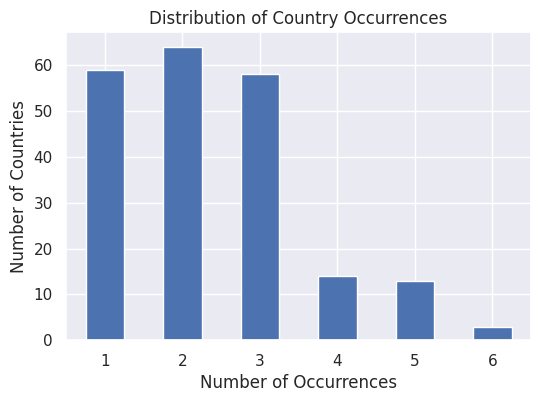

In [10]:
# Get the count of occurrences for each country
country_counts = car_data['country'].value_counts()

# Plot the histogram
plt.figure(figsize=(6, 4))
country_counts.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of Countries')
plt.title('Distribution of Country Occurrences')
plt.xticks(rotation=0)
plt.show()

As expected, everything here is relatively good.

Next, let's check for outliers. 

In [11]:
columns = ['age', 'annual_salary', 'credit_card_debt', 'net_worth', 'car_purch_amount']

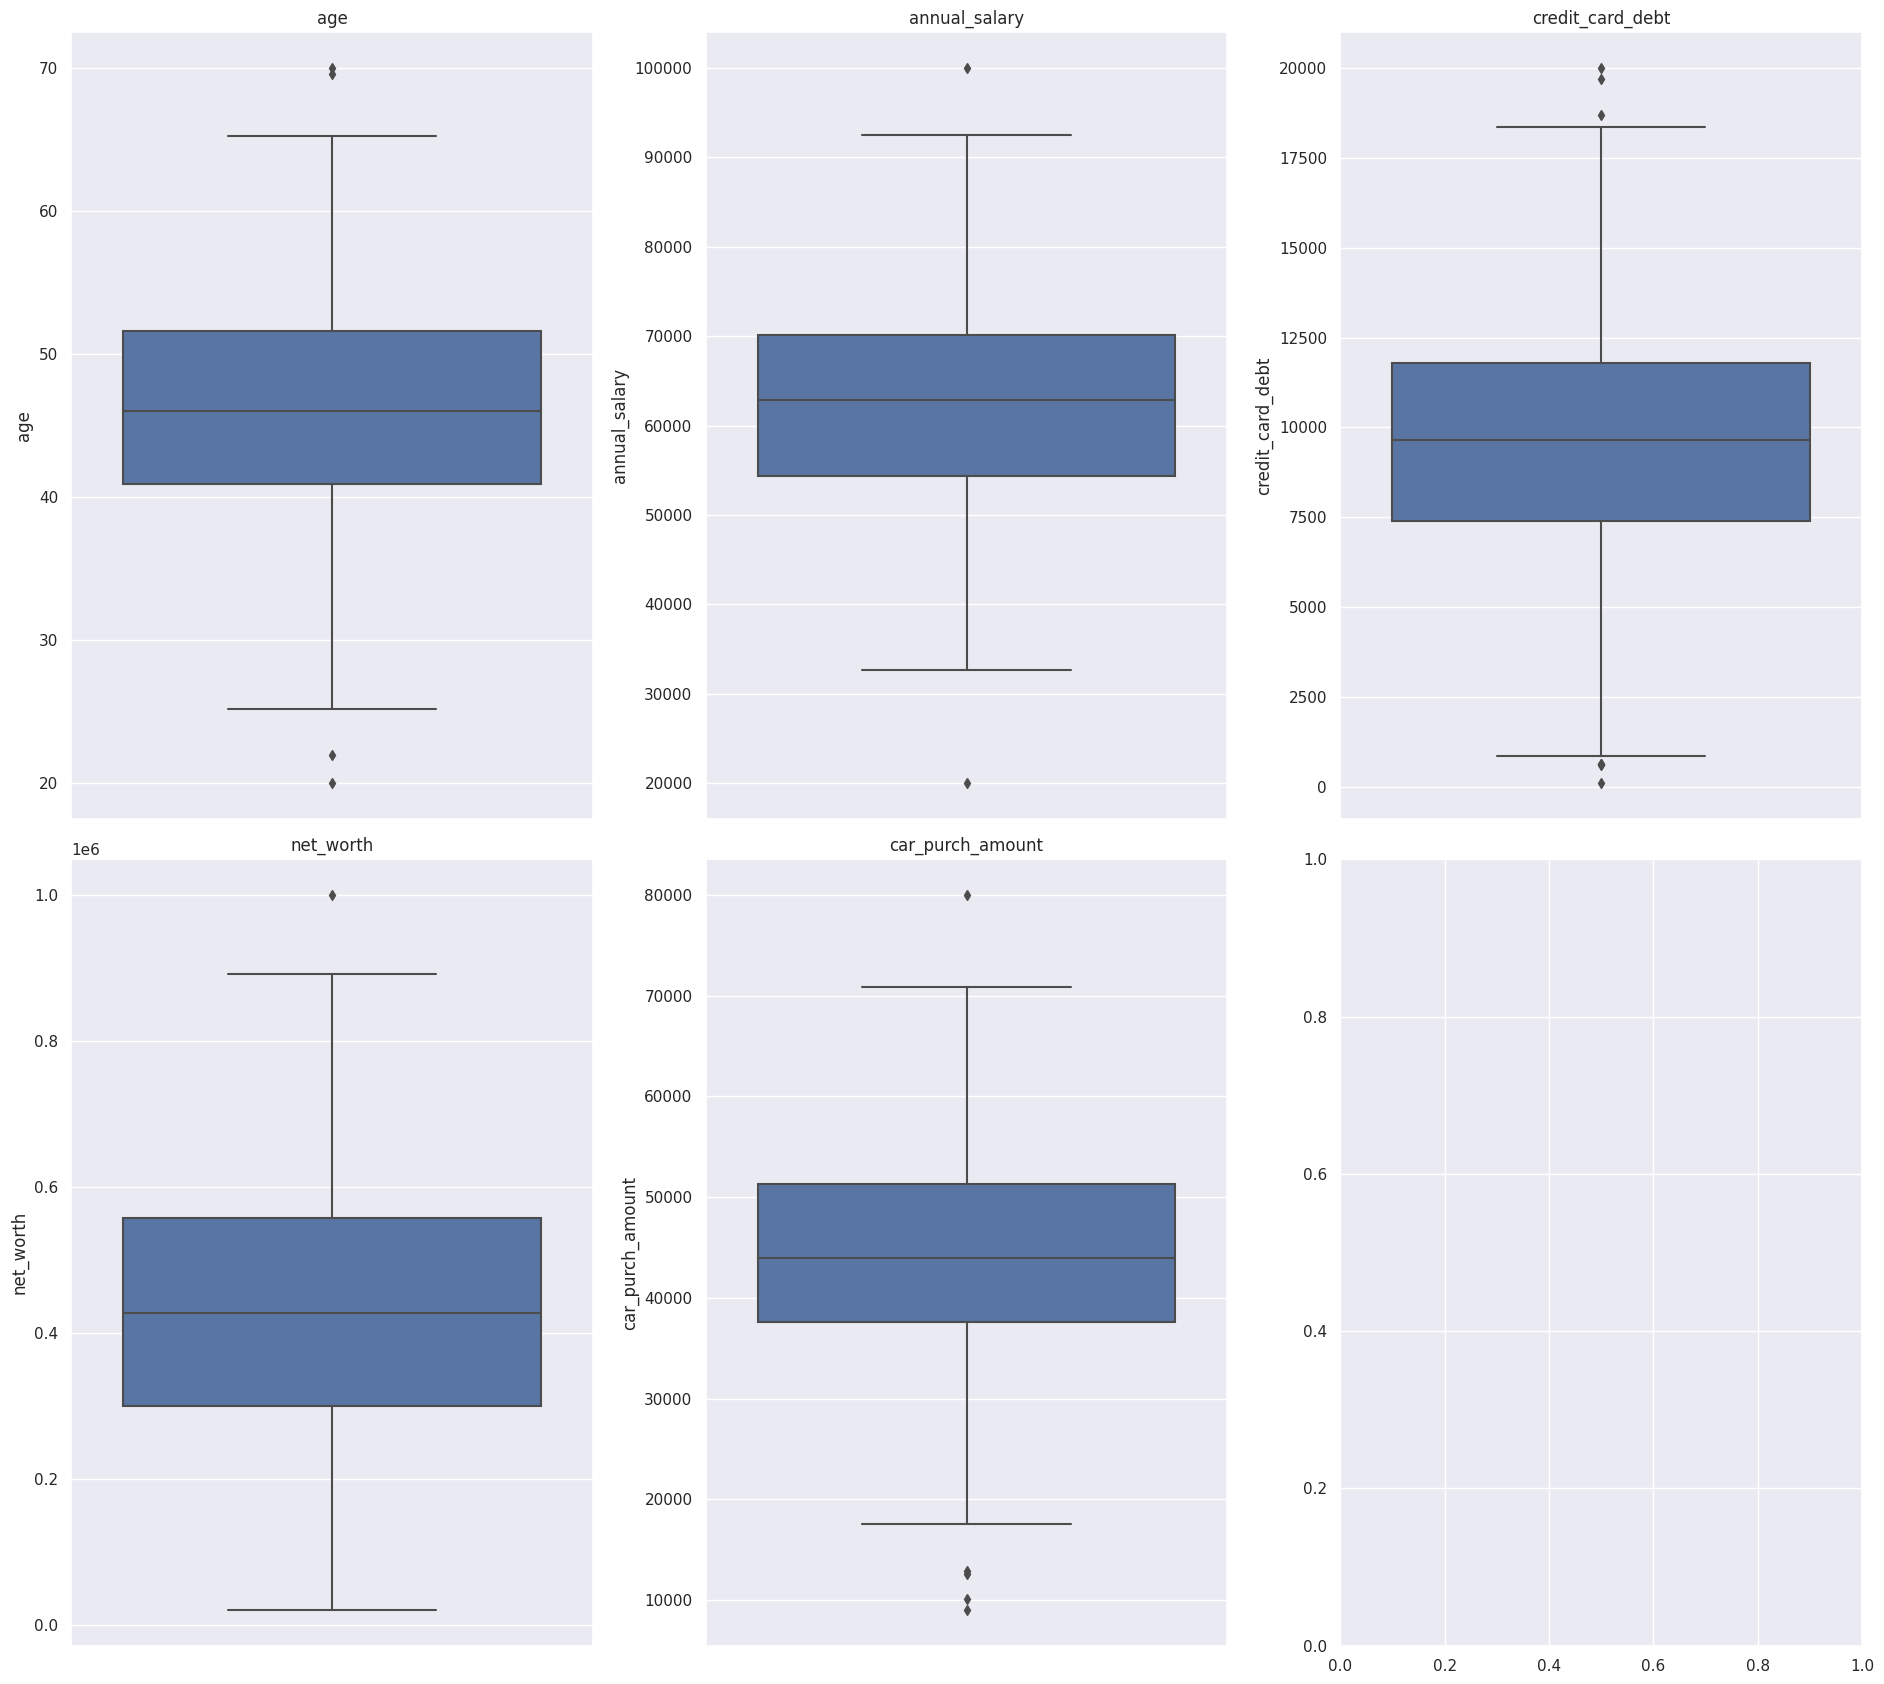

In [12]:
def plot_boxplots(dataframe, num_vars):
    '''
    Function to create boxplots for numerical variables.

    Args:
        dataframe: The DataFrame containing the data.
        num_vars: The nemeric variables in the DataFrame.

    Returns:
        None
    '''

    # Create subplots for each numerical variable
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19, 17))
    axs = axs.flatten()

    # Iterate through numerical variables
    for i, var in enumerate(num_vars):
        # Create a boxplot for each variable
        sns.boxplot(y=var, data=dataframe, ax=axs[i])
        axs[i].set_title(var)  # Set the title of each subplot

    plt.tight_layout()  # Adjust layout for better appearance
    plt.show()

# Call the function
plot_boxplots(car_data, columns)

Outliers are present in small quantities. I attempted to remove them, but it significantly worsened the model; hence, we'll leave them as they are.

Let's check the data for linearity and assess the distributions.

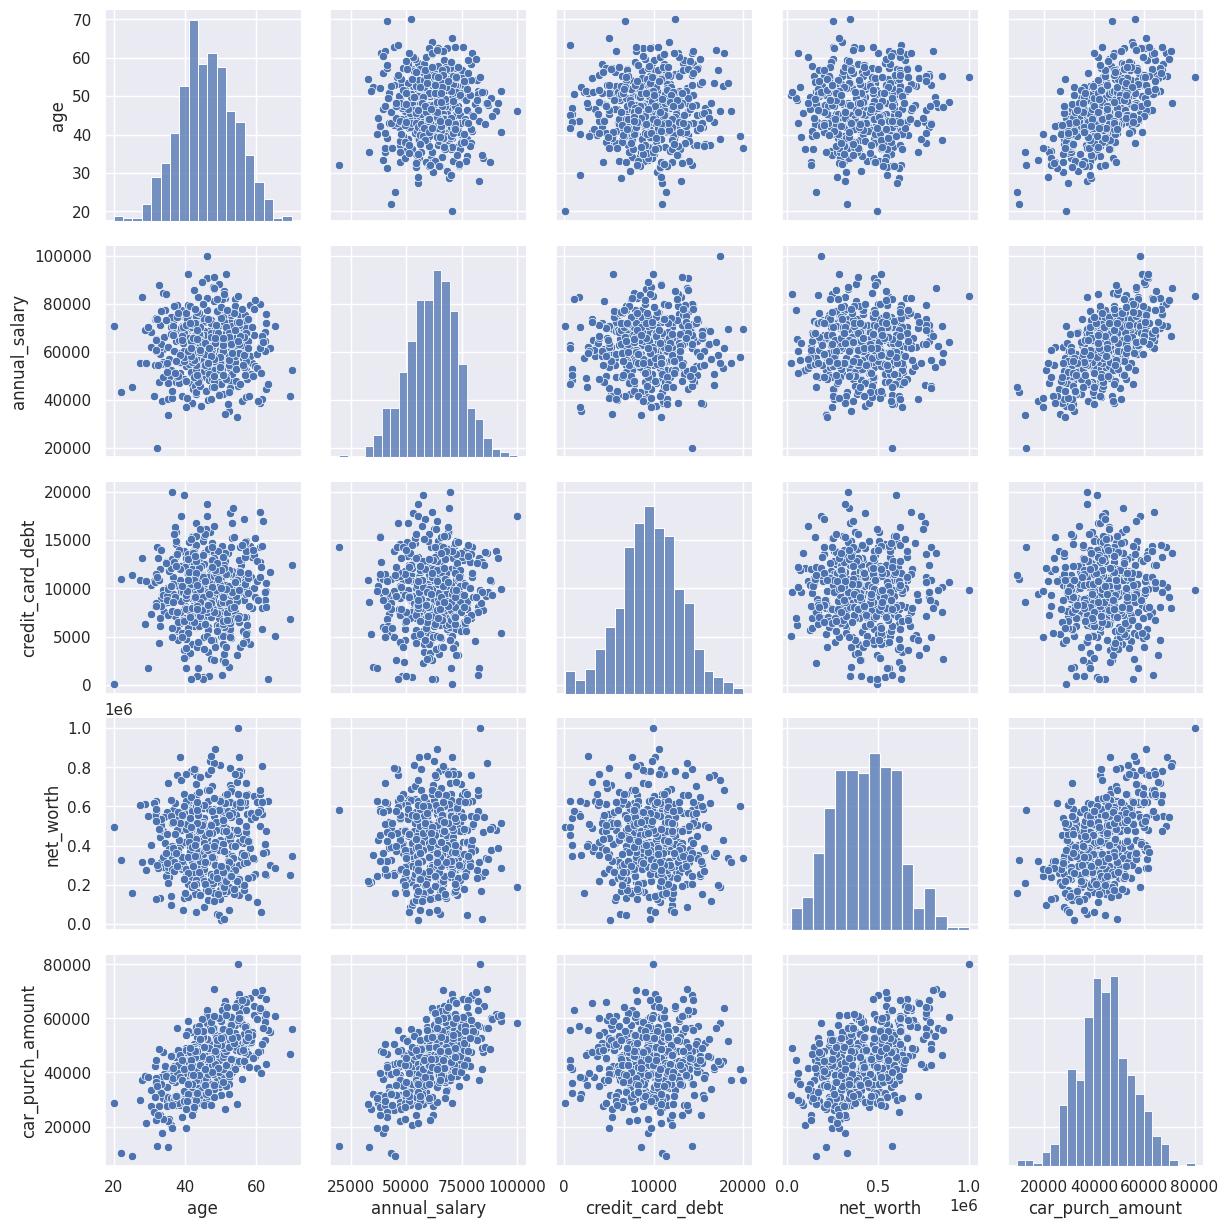

In [13]:
# Create a pairplot
sns.pairplot(car_data[columns])
plt.show()

Linearity is present, and the distributions are unimodal and relatively symmetrical.

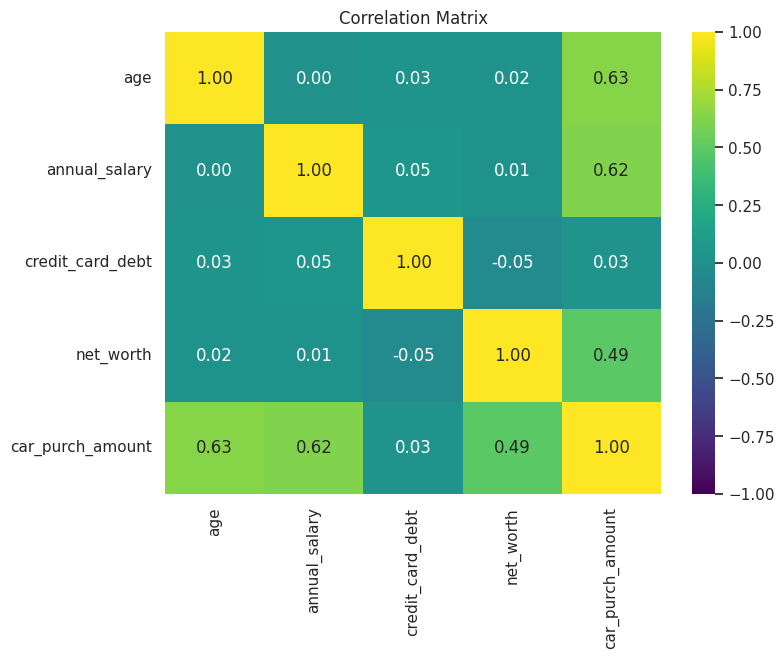

In [14]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(car_data[columns].corr(), vmax=1, vmin=-1, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Strong correlation is observed between several predictors and the target variable. There is no correlation among the independent variables, so we can exclude multicollinearity.
It seems that linear regression should perform well here.

# **Linear Regression Model**

In [15]:
# Extracting features (independent variables) by dropping columns 'name', 'e-mail', 'gender', 'country', 'car_purch_amount'
X = car_data.drop(['name', 'e-mail', 'gender', 'country', 'car_purch_amount'], axis=1)

# Extracting the target variable (dependent variable) 'car_purch_amount'
y = car_data['car_purch_amount']

In [16]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (X_train, X_test, y_train, y_test)
# The test_size parameter defines the proportion of the dataset to include in the test split
# random_state is used for reproducibility to obtain the same split each time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression

# Creating an instance of the linear regression model
lr = LinearRegression()

# Training the linear regression model on the training data (X_train - features, y_train - target variable)
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# Generating predictions using the trained linear regression model on the test data (X_test)
y_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# The mean_squared_error() function computes the mean squared error between the true target (y_test) and predicted target (y_pred).
print(f'Mean Squared Error (MSE): {mse}')

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
# The r2_score() function computes the coefficient of determination (R-squared) to evaluate the performance of the model.
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 2.0794541441556262
R-squared: 0.9999999826610021


A low mean squared error (MSE) signifies minimal divergence between predicted and actual values, suggesting an excellent model fit and precise predictions. Additionally, achieving an R-squared value approaching 1 implies that nearly all variance in the dependent variable is accounted for by the employed predictors. This reaffirms the model's excellent fit to the data and its ability to make accurate predictions.

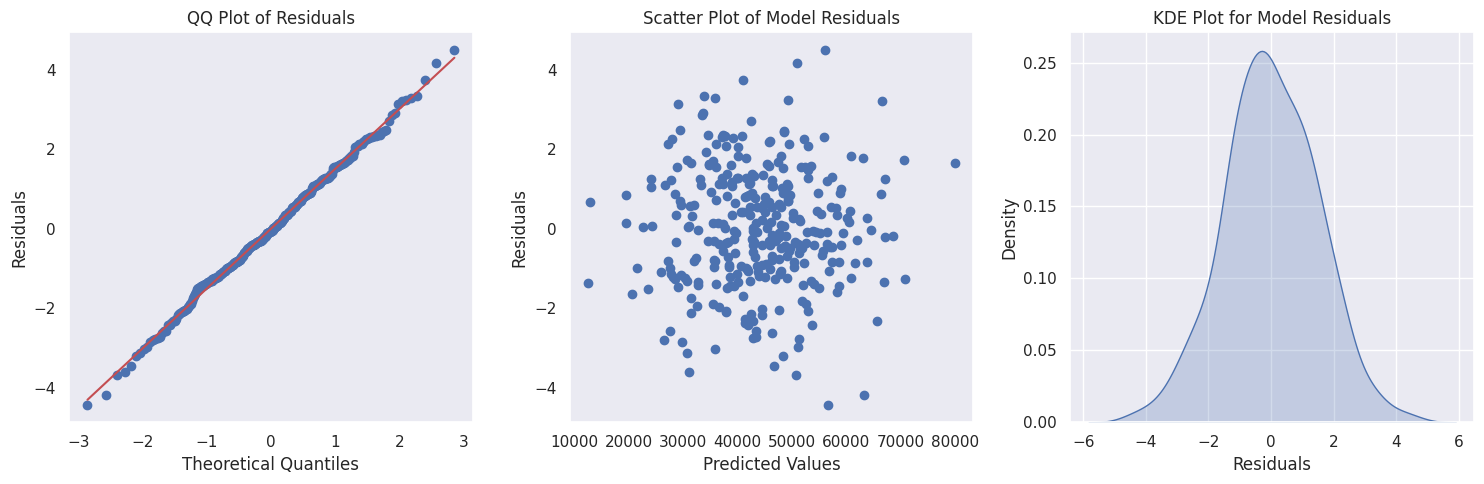

In [20]:
import scipy.stats as stats

# Create a figure with one row and three columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

y_pred_train = lr.predict(X_train)

# Calculate residuals (the differences between true y values and predicted y values)
residuals = y_train - y_pred_train

# QQ plot for residuals
plt.subplot(131)  # Subplot 1
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Residuals')
plt.title('QQ Plot of Residuals')
plt.grid()

# Scatter plot of predicted values vs residuals
plt.subplot(132)  # Subplot 2
plt.scatter(y_pred_train, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter Plot of Model Residuals')
plt.grid()

# KDE plot for residuals
plt.subplot(133)  # Subplot 3
sns.kdeplot(residuals, fill=True)  # Kernel Density Estimation (KDE) plot for residuals
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('KDE Plot for Model Residuals')

# Adjust distances between plots
plt.tight_layout()

# Show the plots
plt.show()

If the distribution of the model residuals roughly approximates a normal distribution, the model is likely performing well with the data.

To explore more detailed statistics, let's build a similar model using another Python module.

In [21]:
import statsmodels.api as sm

# Using Ordinary Least Squares (OLS) method to fit the model on training data
model = sm.OLS(y_train, X_train).fit()

# Printing the summary of the fitted model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       car_purch_amount   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              6816.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):                   5.88e-309
Time:                        22:36:57   Log-Likelihood:                         -3221.0
No. Observations:                 325   AIC:                                      6450.
Df Residuals:                     321   BIC:                                      6465.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Here, we can observe all the coefficients obtained from the model, ensuring their statistical significance. Additionally, obtaining the Adj. R-squared value is more appropriate in the case of multiple regression for a more accurate assessment.